In [1]:
import pandas as pd
pd.set_option('max_columns', None) #show the full dataframe
pd.set_option('max_colwidth', None) # show the full column

# def get_gtd_df():
#     """This function converts the user's local excel file into a dataframe. The excel file can be 
#     retrived by registeering with https://www.start.umd.edu/gtd/.
#     This function returns a dataframe with 135 columns """
#     df = pd.read_excel('globalterrorismdb_0522dist.xlsx')
#     return df

In [2]:
# df = get_gtd_df()
# df.info()

In [3]:
# def clean_gt_df(df):
#     """ This function takes in a df from the get_gtd_df() function and removes columns with more than 20k null values.
#     Args: takes in a dataframe
#     Returns: dataframe with 44 columns, each column <10% null"""
#     cols_to_drop = []
#     for col in list(df.columns):
#         if df[col].isna().sum() > 20_000:
#             cols_to_drop.append(col)
#     df = df.drop(columns = cols_to_drop)
#     return df

In [4]:
# df = clean_gt_df(df)
# df.info()

In [5]:
# def get_and_clean_gtd():
#     df = get_gtd_df()
#     df = clean_gt_df(df)
#     return df

In [6]:
# df = get_and_clean_gtd()
# df.info()

### further cleaning/preprocessing tasks:
- send df to csv once it looks the way we want: set up local retrieval from memory as opposed to df creation each time
- dropping columns/rows: 
    - filter by date: 2000-17
        - day/month/year into a DTG column, convert to correct type
    - filter by location?: maybe pick Irag or Afghanistan to narrow the focus for our MVP
    

In [7]:
import pandas

def from_codys_csv():
    df = pd.read_csv('final_df.csv')
    return df

df = from_codys_csv()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62724 entries, 0 to 62723
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        62724 non-null  int64  
 1   Unnamed: 0.1      62724 non-null  int64  
 2   eventid           62724 non-null  int64  
 3   iyear             62724 non-null  int64  
 4   imonth            62724 non-null  int64  
 5   iday              62724 non-null  int64  
 6   country_txt       62724 non-null  object 
 7   region_txt        62724 non-null  object 
 8   provstate         62724 non-null  object 
 9   city              62552 non-null  object 
 10  latitude          62344 non-null  float64
 11  longitude         62344 non-null  float64
 12  success           62724 non-null  int64  
 13  suicide           62724 non-null  int64  
 14  attacktype1       62724 non-null  int64  
 15  attacktype1_txt   62724 non-null  object 
 16  targtype1         62724 non-null  int64 

In [8]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property
0,0,71653,200101010004,2001,1,1,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1


In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'eventid', 'iyear', 'imonth', 'iday',
       'country_txt', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1_txt', 'gname', 'claimed', 'weaptype1_txt',
       'weapsubtype1_txt', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property'],
      dtype='object')

In [10]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head(1)

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property
0,200101010004,2001,1,1,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1


In [11]:
df.isna().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
provstate              0
city                 172
latitude             380
longitude            380
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1              0
targtype1_txt          0
targsubtype1        4185
targsubtype1_txt    4185
corp1               5889
target1               85
natlty1_txt          902
gname                  0
claimed                0
weaptype1_txt          0
weapsubtype1_txt    4719
nkill               2506
nkillus              264
nkillter            1608
nwound              4338
nwoundus             412
nwoundte            2567
property               0
dtype: int64

In [12]:
df.head(5)

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property
0,200101010004,2001,1,1,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1
1,200101030001,2001,1,3,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,1,3,Bombing/Explosion,3,Police,22.0,"Police Building (headquarters, station, school)",Istanbul Police,Istanbul Police Station,Turkey,Devrimici Halk Kurtulus Cephesi (DHKP/C),0.0,Explosives,Suicide (carried bodily by human being),3.0,0.0,1.0,7.0,0.0,0.0,1
2,200101060005,2001,1,6,somalia,Sub-Saharan Africa,Bakool,Tayeeglow,4.010857,44.513226,0,0,1,Assassination,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Somalia government,"Abdalla Derow Issak, parliament's Speaker and other government officials",Somalia,Rahanwein Resistance Army (RRA),0.0,Firearms,Automatic or Semi-Automatic Rifle,NaN,0.0,0.0,NaN,0.0,NaN,1
3,200101070003,2001,1,7,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Istanbul Police,Istanbul Police Vehicle,Turkey,Devrimici Halk Kurtulus Cephesi (DHKP/C),0.0,Firearms,Unknown Gun Type,0.0,0.0,0.0,1.0,0.0,0.0,1
4,200101070007,2001,1,7,afghanistan,South Asia,Bamyan,Yakawlang,34.733333,66.966667,1,0,2,Armed Assault,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Civilians living in the vicinity of Yakawlang,Afghanistan,Taliban,0.0,Firearms,Unknown Gun Type,150.0,0.0,0.0,NaN,0.0,0.0,-9


In [13]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt',
       'gname', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property'],
      dtype='object')

In [14]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'eventid'}>,
        <AxesSubplot:title={'center':'iyear'}>,
        <AxesSubplot:title={'center':'imonth'}>,
        <AxesSubplot:title={'center':'iday'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'success'}>,
        <AxesSubplot:title={'center':'suicide'}>],
       [<AxesSubplot:title={'center':'attacktype1'}>,
        <AxesSubplot:title={'center':'targtype1'}>,
        <AxesSubplot:title={'center':'targsubtype1'}>,
        <AxesSubplot:title={'center':'claimed'}>],
       [<AxesSubplot:title={'center':'nkill'}>,
        <AxesSubplot:title={'center':'nkillus'}>,
        <AxesSubplot:title={'center':'nkillter'}>,
        <AxesSubplot:title={'center':'nwound'}>],
       [<AxesSubplot:title={'center':'nwoundus'}>,
        <AxesSubplot:title={'center':'nwoundte'}>,
        <AxesSubplot:title={'center':'property'}>, <AxesSubplot:>]],
      dtype=object)

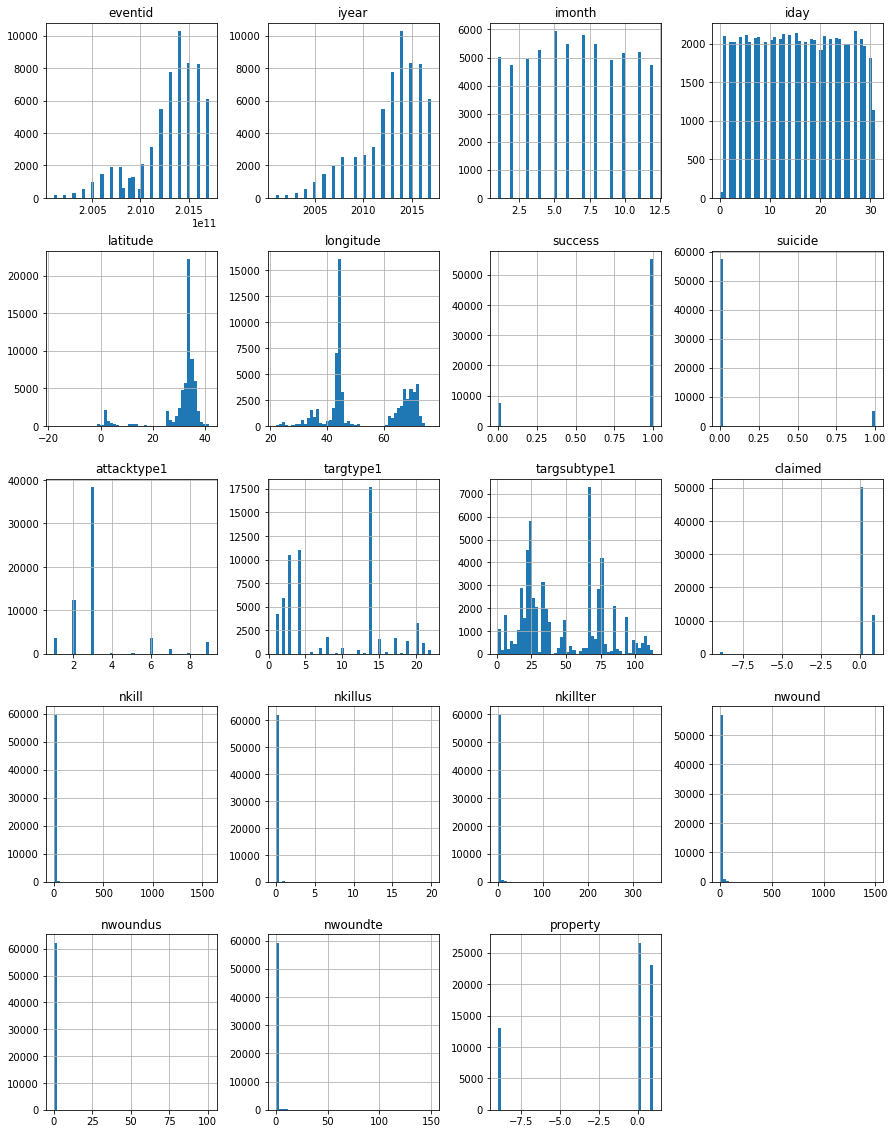

In [15]:
df.hist(figsize=(15,20), bins=50)


In [16]:
df.country_txt.value_counts()

iraq            24465
afghanistan     12593
pakistan        12502
somalia          3964
syria            2055
egypt            2004
turkey           1768
israel           1158
sudan             884
lebanon           597
saudi arabia      347
bahrain           168
iran              139
jordan             38
cyprus             23
kuwait             12
djibouti            4
qatar               3
Name: country_txt, dtype: int64

In [17]:
df.gname.value_counts().head(10)

Unknown                                        37654
Taliban                                         7473
Islamic State of Iraq and the Levant (ISIL)     5553
Al-Shabaab                                      2868
Tehrik-i-Taliban Pakistan (TTP)                 1350
Kurdistan Workers' Party (PKK)                  1219
Al-Qaida in Iraq                                 637
Sinai Province of the Islamic State              443
Khorasan Chapter of the Islamic State            338
Baloch Republican Army (BRA)                     312
Name: gname, dtype: int64

In [18]:
df.describe()

,eventid,iyear,imonth,iday,latitude,longitude,success,suicide,attacktype1,targtype1,targsubtype1,claimed,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property
count,6.272400e+04,62724.000000,62724.000000,62724.000000,62344.000000,62344.000000,62724.000000,62724.000000,62724.000000,62724.000000,58539.000000,62724.000000,60218.000000,62460.000000,61116.000000,58386.000000,62312.000000,60157.000000,62724.000000
mean,2.012926e+11,2012.858954,6.494101,15.670381,31.008870,52.660286,0.880763,0.082504,3.222499,8.810886,47.567844,0.098399,2.884088,0.013176,0.625974,4.404446,0.015567,0.156175,-1.503858
std,3.323630e+08,3.324447,3.371698,8.799061,8.200207,13.414067,0.324069,0.275134,1.705297,6.454706,28.461146,0.993455,12.242684,0.221203,3.836841,15.712687,0.639402,1.690060,3.867404
min,2.001010e+11,2001.000000,1.000000,0.000000,-17.848728,22.024167,0.000000,0.000000,1.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,2.011102e+11,2011.000000,4.000000,8.000000,31.631083,43.706276,1.000000,0.000000,2.000000,3.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.014022e+11,2014.000000,6.000000,16.000000,33.310650,44.623825,1.000000,0.000000,3.000000,4.000000,36.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.015103e+11,2015.000000,9.000000,23.000000,34.516895,67.143311,1.000000,0.000000,3.000000,14.000000,73.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,41.410610,76.540559,1.000000,1.000000,9.000000,22.000000,113.000000,1.000000,1570.000000,20.000000,346.000000,1500.000000,101.000000,150.000000,1.000000


## Initial questions and ideas:
 - what are the most prominent terror groups in the timeframe 2000-2017? This would be answered in terms of:
    - number of attacks
    - number of attributed fatalities/injuries
    - value of property destroyed
    - the victims/targets of their attacks
- is there a change in the magnitude and methods of attacks over time? in terms of:
    - target type: military/civilian/commercial
    - weapon/method used to perpetrate the attack
    - casualties and property damage
    - frequency of attacks
    - main question: are terror groups generally changing the types of targets, or their weapons over the period observed?
- what is the sphere of influence for each organization?
    - lat/long for attacks
    - time lapse: compare the influence of the organization by distance covered
    - break into yearly chunks to compare most influential organization by time period
    - severity of attacks is also a consideration
- where is most terrorism occuring?
    - geographic heatmap
    - yearly overlays/time series overlays
    - do terror groups target groups/infrastructure that is close together, or are the attacks geographically spread out?
    

## D's questions:
- countries with highest attacks in terms of attack type and frequency?
- what are the most common types of attacks?
- increase of specific types of attacks in the timeframe?
- relationship between type of attack and casulaties?
    - type and success?
    - type and group?
    - city?
    - prop damage?
    - day of week? Sat/Sunday?
    >> ramadan? more or less attacks?
    - day of month?
    - is nationality tied to type of attack? >> certain groups made up of certain nationalities
    - success rate over time?
    - weapon type over time?
    - organizations patterns? by region, weapon, type

## Cody's questions:
- gaining momentum?
- can we see a power vacuum? Syria, etc
- has methodology of attack changed?
- people or infrastructure?
- which groups are most successful in attacks?
- which are most likely to perpetrate which types of attack?


## Primary Questions and Division of Labor:
- 1. Deangelo: predicitve model to attribute the unnattributed attacks in the dataset (60%)
    - feature engineering on most predictive variables
    - lat/long
    - time line
    - detective work baby!
    - classification model with multiple likelihoods, eg. 90% boko haram, 5% al shabab
    - but need to focus on groups that have perpetrated more than 300 attacks during years observed. Drop groups under that threshold.
- 2. Cody: predictive model on who is likely to be targeted
    - classification model
    - not using perpetrator info (group label)
- 3. Fred: Tableau dashboards
    - geographic heatmaps:
        - attacks by group: geographic sphere of influence, over time
        - then: add in the unknown attacks, with attribution from DeAngleo's model
        - finally: add in victim risk profiles from Cody's model

In [19]:
df2 = pd.DataFrame(df.groupby('gname').filter(lambda x : len(x)>300))
df2 = df2[df2['region_txt'].str.contains('Western Europe')==False]
df2.country_txt.value_counts()

iraq            23859
afghanistan     12401
pakistan        11186
somalia          3850
egypt            1683
turkey           1658
syria            1358
israel            509
lebanon           464
sudan             449
saudi arabia      150
bahrain           136
iran               77
jordan             33
kuwait              6
djibouti            3
qatar               2
Name: country_txt, dtype: int64

In [20]:
df2.gname.value_counts()

Unknown                                        37631
Taliban                                         7473
Islamic State of Iraq and the Levant (ISIL)     5553
Al-Shabaab                                      2868
Tehrik-i-Taliban Pakistan (TTP)                 1350
Kurdistan Workers' Party (PKK)                  1219
Al-Qaida in Iraq                                 637
Sinai Province of the Islamic State              443
Khorasan Chapter of the Islamic State            338
Baloch Republican Army (BRA)                     312
Name: gname, dtype: int64

In [21]:
df2[df2.gname == 'Baloch Republican Army (BRA)'].country_txt.value_counts()

pakistan    312
Name: country_txt, dtype: int64

In [22]:
len(df2)

57824

In [23]:
df2.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt',
       'gname', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property'],
      dtype='object')

In [24]:
df.region_txt.value_counts()

Middle East & North Africa    32754
South Asia                    25095
Sub-Saharan Africa             4852
Western Europe                   23
Name: region_txt, dtype: int64

In [25]:
df2.to_csv('gtd_filtered.csv', index=False)

## additional to-do for Tableau Dashboard
- convert date columns to DTG type, and concat the columns
- UDEMY dashboard course
- 

In [26]:
df2.nkill.max()

1570.0

In [27]:
# df.query
# add DTG column

In [28]:
df2.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property
0,200101010004,2001,1,1,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1
4,200101070007,2001,1,7,afghanistan,South Asia,Bamyan,Yakawlang,34.733333,66.966667,1,0,2,Armed Assault,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Civilians living in the vicinity of Yakawlang,Afghanistan,Taliban,0.0,Firearms,Unknown Gun Type,150.0,0.0,0.0,NaN,0.0,0.0,-9
7,200101100004,2001,1,10,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,2,Armed Assault,3,Police,25.0,Police Security Forces/Officers,Turkish Police,"Police in Istanbul, Turkey",Turkey,Unknown,-9.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,1.0,0.0,0.0,1
8,200101110003,2001,1,11,israel,Middle East & North Africa,Jerusalem,Jerusalem,31.771599,35.203400,0,0,3,Bombing/Explosion,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Israeli neighborhood,Civilians in Jerusalem,Israel,Unknown,0.0,Explosives,Remote Trigger,0.0,0.0,0.0,0.0,0.0,0.0,0
12,200101230007,2001,1,23,turkey,Middle East & North Africa,Mersin,Unknown,36.806853,34.628893,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Nationalist Movement Party (MHP),An election bus of the Nationalist Movement Party (MHP),Turkey,Unknown,0.0,Explosives,Other Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62724 entries, 0 to 62723
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           62724 non-null  int64  
 1   iyear             62724 non-null  int64  
 2   imonth            62724 non-null  int64  
 3   iday              62724 non-null  int64  
 4   country_txt       62724 non-null  object 
 5   region_txt        62724 non-null  object 
 6   provstate         62724 non-null  object 
 7   city              62552 non-null  object 
 8   latitude          62344 non-null  float64
 9   longitude         62344 non-null  float64
 10  success           62724 non-null  int64  
 11  suicide           62724 non-null  int64  
 12  attacktype1       62724 non-null  int64  
 13  attacktype1_txt   62724 non-null  object 
 14  targtype1         62724 non-null  int64  
 15  targtype1_txt     62724 non-null  object 
 16  targsubtype1      58539 non-null  float6

<AxesSubplot:>

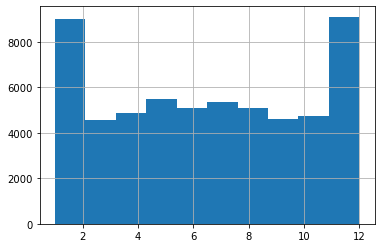

In [30]:
df2.imonth.hist()

<AxesSubplot:>

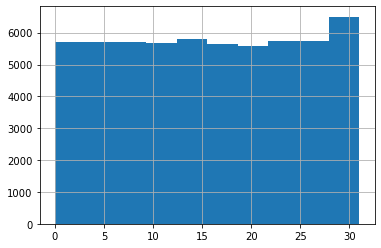

In [31]:
df2.iday.hist()

In [32]:
df2[df2.iday == 0].count()

eventid             65
iyear               65
imonth              65
iday                65
country_txt         65
region_txt          65
provstate           65
city                63
latitude            63
longitude           63
success             65
suicide             65
attacktype1         65
attacktype1_txt     65
targtype1           65
targtype1_txt       65
targsubtype1        62
targsubtype1_txt    62
corp1               38
target1             65
natlty1_txt         65
gname               65
claimed             65
weaptype1_txt       65
weapsubtype1_txt    44
nkill               63
nkillus             65
nkillter            65
nwound              63
nwoundus            65
nwoundte            65
property            65
dtype: int64

In [33]:
df2 = df2[df2.iday != 0]

In [34]:
df2[df2.iday == 0].count()

eventid             0
iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
target1             0
natlty1_txt         0
gname               0
claimed             0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nkillus             0
nkillter            0
nwound              0
nwoundus            0
nwoundte            0
property            0
dtype: int64

In [35]:
df2['date'] = pd.to_datetime(df2.iyear.astype(str) + '/' + df2.imonth.astype(str) + '/' + df2.iday.astype(str))
df2.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,date
0,200101010004,2001,1,1,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1,2001-01-01
4,200101070007,2001,1,7,afghanistan,South Asia,Bamyan,Yakawlang,34.733333,66.966667,1,0,2,Armed Assault,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Civilians living in the vicinity of Yakawlang,Afghanistan,Taliban,0.0,Firearms,Unknown Gun Type,150.0,0.0,0.0,NaN,0.0,0.0,-9,2001-01-07
7,200101100004,2001,1,10,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,2,Armed Assault,3,Police,25.0,Police Security Forces/Officers,Turkish Police,"Police in Istanbul, Turkey",Turkey,Unknown,-9.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,1.0,0.0,0.0,1,2001-01-10
8,200101110003,2001,1,11,israel,Middle East & North Africa,Jerusalem,Jerusalem,31.771599,35.203400,0,0,3,Bombing/Explosion,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Israeli neighborhood,Civilians in Jerusalem,Israel,Unknown,0.0,Explosives,Remote Trigger,0.0,0.0,0.0,0.0,0.0,0.0,0,2001-01-11
12,200101230007,2001,1,23,turkey,Middle East & North Africa,Mersin,Unknown,36.806853,34.628893,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Nationalist Movement Party (MHP),An election bus of the Nationalist Movement Party (MHP),Turkey,Unknown,0.0,Explosives,Other Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,2001-01-23


In [36]:
df2.query('nkill > nwound')

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,date
22,200102060004,2001,2,6,sudan,Sub-Saharan Africa,Kassala,Aroma,15.812574,36.138246,1,0,7,Facility/Infrastructure Attack,3,Police,25.0,Police Security Forces/Officers,Sudanese Police,Major Ibrahim Muhammad Yusuf and 9 other policemen stationed at Isa al-Hajj Police Station,Sudan,Unknown,0.0,Unknown,NaN,7.0,0.0,0.0,3.0,0.0,0.0,-9,2001-02-06
36,200102220002,2001,2,22,pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1,0,2,Armed Assault,3,Police,25.0,Police Security Forces/Officers,Pakistan Police,"Policeman, Abid Shah",Pakistan,Unknown,0.0,Firearms,Unknown Gun Type,2.0,0.0,0.0,0.0,0.0,0.0,0,2001-02-22
55,200103200002,2001,3,20,kuwait,Middle East & North Africa,Asimah,Kuwait,29.289577,48.049629,1,0,1,Assassination,10,Journalists & Media,53.0,Newspaper Journalist/Staff/Facility,Al-Majalis Magazine,"Hidaya Sultan Al-Salem, editor-in-chief and owner of Al-Majalis magazine",Kuwait,Unknown,0.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,0.0,0.0,0.0,0,2001-03-20
68,200104040005,2001,4,4,iraq,Middle East & North Africa,Dihok,Duhok,36.860813,42.976460,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Kurdish Democratic Party (KDP),Civil engineers working for the Kurdish Democratic Party,Iraq,Kurdistan Workers' Party (PKK),0.0,Explosives,Landmine,7.0,0.0,0.0,2.0,0.0,0.0,1,2001-04-04
101,200106130002,2001,6,13,pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1,0,3,Bombing/Explosion,1,Business,2.0,Restaurant/Bar/Café,Tandoori Hut restaurant,Tandoori Hut restaurant and the five patrons,Pakistan,Unknown,0.0,Explosives,Unknown Explosive Type,5.0,0.0,0.0,0.0,0.0,0.0,1,2001-06-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62714,201712310006,2017,12,31,afghanistan,South Asia,Nangarhar,Jalalabad,34.417122,70.449593,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Not Applicable,Funeral Procession of Former District Governor,Afghanistan,Khorasan Chapter of the Islamic State,0.0,Explosives,Vehicle,18.0,0.0,0.0,14.0,0.0,0.0,-9,2017-12-31
62715,201712310007,2017,12,31,iraq,Middle East & North Africa,Nineveh,Baaj,36.045059,41.716717,0,0,9,Unknown,4,Military,39.0,Paramilitary,Iraqi Volunteer Forces,Troops,Iraq,Islamic State of Iraq and the Levant (ISIL),0.0,Unknown,NaN,5.0,0.0,5.0,0.0,0.0,0.0,0,2017-12-31
62717,201712310009,2017,12,31,afghanistan,South Asia,Logar,Mohammad Agha district,34.217806,69.109316,1,0,3,Bombing/Explosion,3,Police,23.0,Police Patrol (including vehicles and convoys),Afghan Local Police (ALP),Vehicle,Afghanistan,Taliban,1.0,Explosives,Remote Trigger,5.0,0.0,0.0,0.0,0.0,0.0,1,2017-12-31
62718,201712310012,2017,12,31,iraq,Middle East & North Africa,Diyala,Muqdadiyah,33.953167,44.921906,0,0,2,Armed Assault,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Iraqi Volunteer Forces,Post,Iraq,Islamic State of Iraq and the Levant (ISIL),0.0,Firearms,Unknown Gun Type,13.0,0.0,13.0,0.0,0.0,0.0,0,2017-12-31


In [37]:
df2.query('nkill > nwound').count()

eventid             15778
iyear               15778
imonth              15778
iday                15778
country_txt         15778
region_txt          15778
provstate           15778
city                15722
latitude            15673
longitude           15673
success             15778
suicide             15778
attacktype1         15778
attacktype1_txt     15778
targtype1           15778
targtype1_txt       15778
targsubtype1        15053
targsubtype1_txt    15053
corp1               14546
target1             15755
natlty1_txt         15494
gname               15778
claimed             15778
weaptype1_txt       15778
weapsubtype1_txt    14241
nkill               15778
nkillus             15737
nkillter            15653
nwound              15778
nwoundus            15742
nwoundte            15461
property            15778
date                15778
dtype: int64

In [38]:
def try_it():
        df = pd.read_csv('final_df.csv')
        df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
        df = df[df.iday != 0]
        df = pd.DataFrame(df.groupby('gname').filter(lambda x : len(x)>300))
        df = df[df['region_txt'].str.contains('Western Europe')==False]
        df['date'] = pd.to_datetime(df.iyear.astype(str) + '/' + df.imonth.astype(str) + '/' + df.iday.astype(str))
        df.to_csv('gtd_cleaned_top_10.csv', index=False)
        return df

In [39]:
df = try_it()
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,date
0,200101010004,2001,1,1,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1,2001-01-01
4,200101070007,2001,1,7,afghanistan,South Asia,Bamyan,Yakawlang,34.733333,66.966667,1,0,2,Armed Assault,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Civilians living in the vicinity of Yakawlang,Afghanistan,Taliban,0.0,Firearms,Unknown Gun Type,150.0,0.0,0.0,NaN,0.0,0.0,-9,2001-01-07
7,200101100004,2001,1,10,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,2,Armed Assault,3,Police,25.0,Police Security Forces/Officers,Turkish Police,"Police in Istanbul, Turkey",Turkey,Unknown,-9.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,1.0,0.0,0.0,1,2001-01-10
8,200101110003,2001,1,11,israel,Middle East & North Africa,Jerusalem,Jerusalem,31.771599,35.203400,0,0,3,Bombing/Explosion,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Israeli neighborhood,Civilians in Jerusalem,Israel,Unknown,0.0,Explosives,Remote Trigger,0.0,0.0,0.0,0.0,0.0,0.0,0,2001-01-11
12,200101230007,2001,1,23,turkey,Middle East & North Africa,Mersin,Unknown,36.806853,34.628893,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Nationalist Movement Party (MHP),An election bus of the Nationalist Movement Party (MHP),Turkey,Unknown,0.0,Explosives,Other Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,2001-01-23


In [40]:
import os
import pandas as pd

def acquire_gtd_df(use_cache=True):
    #use local cache from CSV if available
    filename = 'gtd_cleaned_top_10.csv'
    if os.path.isfile(filename) and use_cache:
        return pd.read_csv(filename)
    else:
        df = pd.read_csv('final_df.csv')
        df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
        df = df[df.iday != 0]
        df = pd.DataFrame(df.groupby('gname').filter(lambda x : len(x)>300))
        df = df[df['region_txt'].str.contains('Western Europe')==False]
        df['date'] = pd.to_datetime(df.iyear.astype(str) + '/' + df.imonth.astype(str) + '/' + df.iday.astype(str))
        df.to_csv(filename, index=False)
        return df

In [41]:
df = acquire_gtd_df()
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1_txt,gname,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,date
0,200101010004,2001,1,1,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1,2001-01-01
1,200101070007,2001,1,7,afghanistan,South Asia,Bamyan,Yakawlang,34.733333,66.966667,1,0,2,Armed Assault,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilians,Civilians living in the vicinity of Yakawlang,Afghanistan,Taliban,0.0,Firearms,Unknown Gun Type,150.0,0.0,0.0,NaN,0.0,0.0,-9,2001-01-07
2,200101100004,2001,1,10,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,2,Armed Assault,3,Police,25.0,Police Security Forces/Officers,Turkish Police,"Police in Istanbul, Turkey",Turkey,Unknown,-9.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,1.0,0.0,0.0,1,2001-01-10
3,200101110003,2001,1,11,israel,Middle East & North Africa,Jerusalem,Jerusalem,31.771599,35.203400,0,0,3,Bombing/Explosion,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Israeli neighborhood,Civilians in Jerusalem,Israel,Unknown,0.0,Explosives,Remote Trigger,0.0,0.0,0.0,0.0,0.0,0.0,0,2001-01-11
4,200101230007,2001,1,23,turkey,Middle East & North Africa,Mersin,Unknown,36.806853,34.628893,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Nationalist Movement Party (MHP),An election bus of the Nationalist Movement Party (MHP),Turkey,Unknown,0.0,Explosives,Other Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,2001-01-23


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57759 entries, 0 to 57758
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           57759 non-null  int64  
 1   iyear             57759 non-null  int64  
 2   imonth            57759 non-null  int64  
 3   iday              57759 non-null  int64  
 4   country_txt       57759 non-null  object 
 5   region_txt        57759 non-null  object 
 6   provstate         57759 non-null  object 
 7   city              57590 non-null  object 
 8   latitude          57460 non-null  float64
 9   longitude         57460 non-null  float64
 10  success           57759 non-null  int64  
 11  suicide           57759 non-null  int64  
 12  attacktype1       57759 non-null  int64  
 13  attacktype1_txt   57759 non-null  object 
 14  targtype1         57759 non-null  int64  
 15  targtype1_txt     57759 non-null  object 
 16  targsubtype1      53797 non-null  float6

In [43]:
def get_perpetrator_df(use_cache=True):
    #use local cache from CSV if available
    filename = 'gtd_perpetrator_attr.csv'
    if os.path.isfile(filename) and use_cache:
        return pd.read_csv(filename)
    else:
        #obtains data and sets to dataframe.
        df = pd.read_csv('final_df.csv')
        df = pd.DataFrame(df.groupby('gname').filter(lambda x : len(x)>300))
        #renames columns
        df = df.rename(columns={'eventid':'event_id', 'iyear':'year', 'imonth':'month', 'iday':'day',
                        'country_txt':'country', 'region_txt':'region', 'attacktype1':'attacktype_n',
                        'attacktype1_txt': 'attack_type', 'targtype1':'targtype_n','targtype1_txt':'targtype',
                        'targsubtype1':'targsubtype_n', 'targsubtype1_txt':'targsubtype', 'corp':'target_id',
                        'target1':'target_description', 'natlty1_txt':'nationality', 'weaptype1_txt':'weaptype',
                        'weapsubtype1_txt':'weapdesc'})
        # removes impossible dates
        df = df[df.day != 0]
        # create date-time
        df['date'] = pd.to_datetime(df.year.astype(str) + '/' + df.month.astype(str) + '/' + df.day.astype(str))
        # drops uneeeded columns
        df = df.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'year', 'month', 'day'})
        df = df.dropna()
        df.to_csv(filename, index=False)
    return df

In [44]:
df = get_perpetrator_df()
df.head()

,event_id,country,region,provstate,city,latitude,longitude,success,suicide,attacktype_n,attack_type,targtype_n,targtype,targsubtype_n,targsubtype,corp1,target_description,nationality,gname,claimed,weaptype,weapdesc,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,date
0,200101010004,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1,2001-01-01
1,200101100004,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,2,Armed Assault,3,Police,25.0,Police Security Forces/Officers,Turkish Police,"Police in Istanbul, Turkey",Turkey,Unknown,-9.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,1.0,0.0,0.0,1,2001-01-10
2,200101110003,israel,Middle East & North Africa,Jerusalem,Jerusalem,31.771599,35.203400,0,0,3,Bombing/Explosion,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Israeli neighborhood,Civilians in Jerusalem,Israel,Unknown,0.0,Explosives,Remote Trigger,0.0,0.0,0.0,0.0,0.0,0.0,0,2001-01-11
3,200101230007,turkey,Middle East & North Africa,Mersin,Unknown,36.806853,34.628893,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Nationalist Movement Party (MHP),An election bus of the Nationalist Movement Party (MHP),Turkey,Unknown,0.0,Explosives,Other Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,2001-01-23
4,200101250002,pakistan,South Asia,Punjab,Sardarpur,30.552887,71.767411,1,0,2,Armed Assault,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,The Tehreek-e-Jafria Pakistan (TJP) party,"Anis Hussain Lak, the Tehreek-e-Jafria Pakistan (TJP) party district vice-president",Pakistan,Unknown,0.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,2.0,0.0,0.0,0,2001-01-25


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40911 entries, 0 to 40910
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            40911 non-null  int64  
 1   country             40911 non-null  object 
 2   region              40911 non-null  object 
 3   provstate           40911 non-null  object 
 4   city                40911 non-null  object 
 5   latitude            40911 non-null  float64
 6   longitude           40911 non-null  float64
 7   success             40911 non-null  int64  
 8   suicide             40911 non-null  int64  
 9   attacktype_n        40911 non-null  int64  
 10  attack_type         40911 non-null  object 
 11  targtype_n          40911 non-null  int64  
 12  targtype            40911 non-null  object 
 13  targsubtype_n       40911 non-null  float64
 14  targsubtype         40911 non-null  object 
 15  corp1               40911 non-null  object 
 16  targ

### Where am I going with this viz?
- produce a time series visualization of attacks/spheres of influence, by group. I wan to incoporate all the monthly data in the timeline and produce a 20-30 visualization per group.
- to do next: get the geometric objects for the geo areas, and color code (blue hues) the provinces by intensity of activity
- area of influence: how far is that from attack location? or from group centroid?
    - figure that out and then add huing onto chart
    

In [47]:
# Let's take a look at some target variable correlations with independent variables: I think that location, and type of attack are going to be the most significant:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

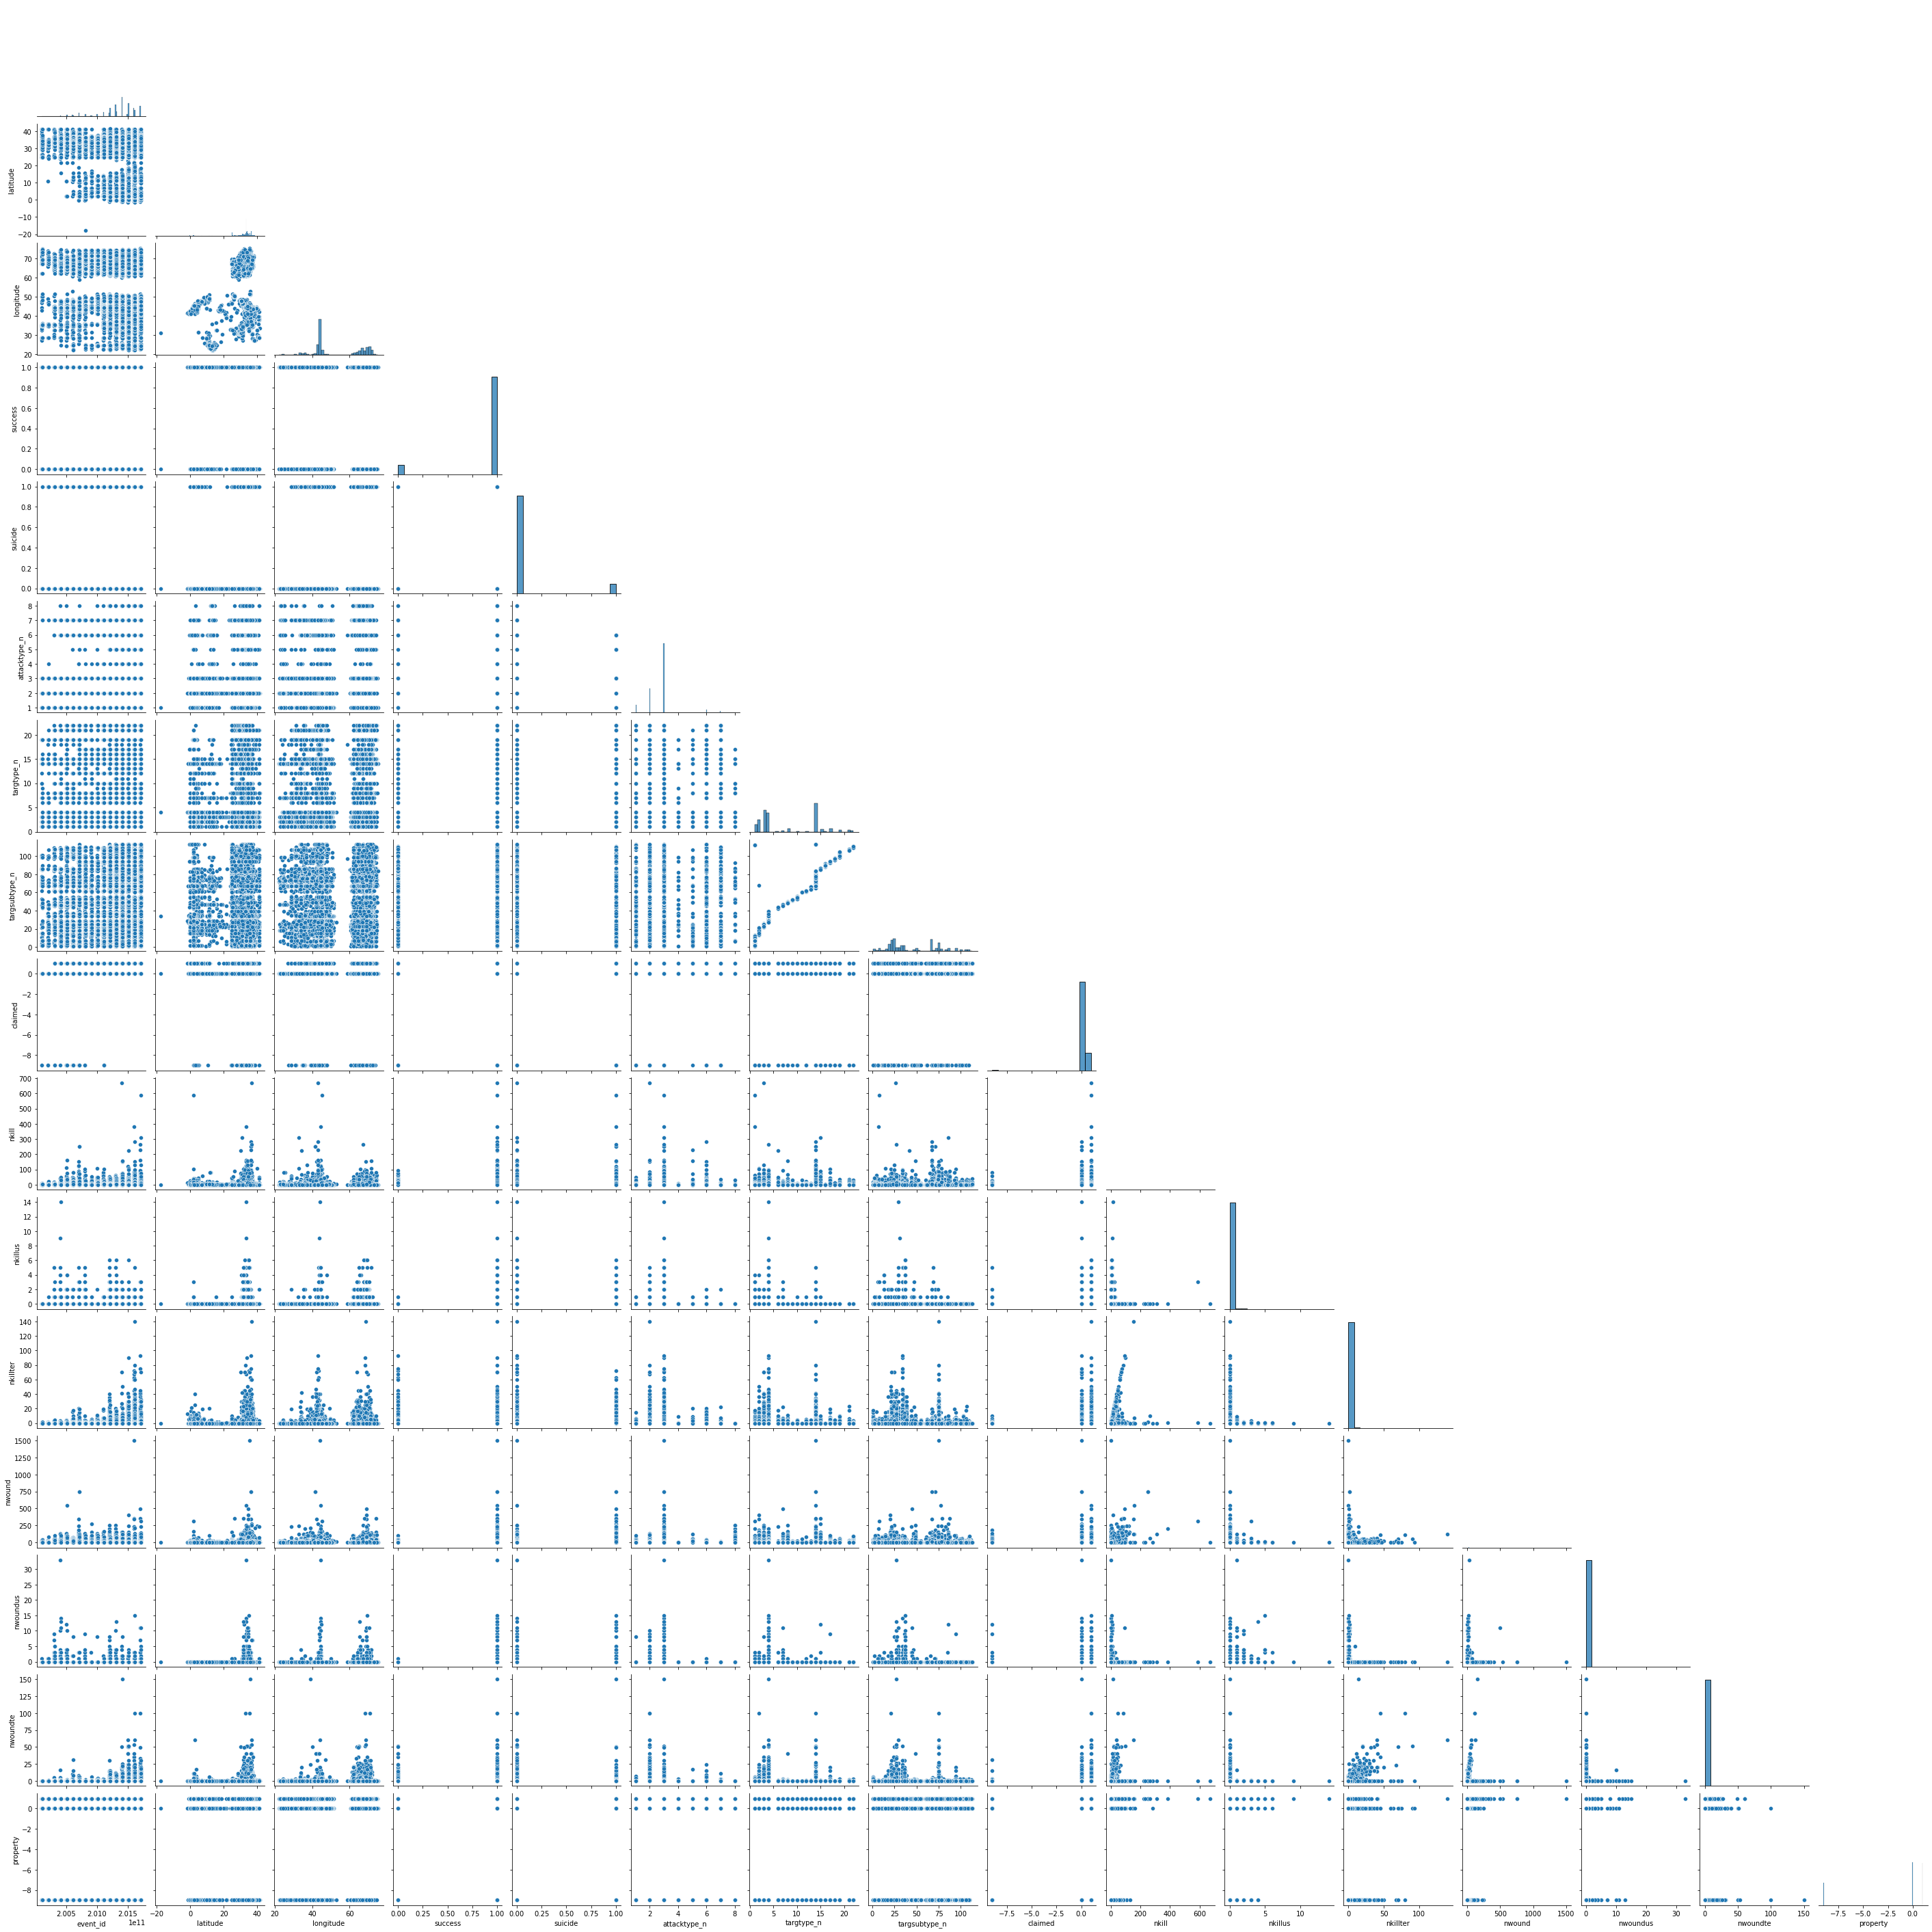

In [49]:
sns.pairplot(df, corner=True)

In [50]:
df.head()

,event_id,country,region,provstate,city,latitude,longitude,success,suicide,attacktype_n,attack_type,targtype_n,targtype,targsubtype_n,targsubtype,corp1,target_description,nationality,gname,claimed,weaptype,weapdesc,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,date
0,200101010004,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,3,Bombing/Explosion,14,Private Citizens & Property,78.0,"Procession/Gathering (funeral, wedding, birthday, religious)",Civilians,Civilians celebrating the new year,Turkey,Unknown,0.0,Explosives,Pipe Bomb,0.0,0.0,0.0,10.0,0.0,0.0,1,2001-01-01
1,200101100004,turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,2,Armed Assault,3,Police,25.0,Police Security Forces/Officers,Turkish Police,"Police in Istanbul, Turkey",Turkey,Unknown,-9.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,1.0,0.0,0.0,1,2001-01-10
2,200101110003,israel,Middle East & North Africa,Jerusalem,Jerusalem,31.771599,35.203400,0,0,3,Bombing/Explosion,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Israeli neighborhood,Civilians in Jerusalem,Israel,Unknown,0.0,Explosives,Remote Trigger,0.0,0.0,0.0,0.0,0.0,0.0,0,2001-01-11
3,200101230007,turkey,Middle East & North Africa,Mersin,Unknown,36.806853,34.628893,1,0,3,Bombing/Explosion,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Nationalist Movement Party (MHP),An election bus of the Nationalist Movement Party (MHP),Turkey,Unknown,0.0,Explosives,Other Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,2001-01-23
4,200101250002,pakistan,South Asia,Punjab,Sardarpur,30.552887,71.767411,1,0,2,Armed Assault,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,The Tehreek-e-Jafria Pakistan (TJP) party,"Anis Hussain Lak, the Tehreek-e-Jafria Pakistan (TJP) party district vice-president",Pakistan,Unknown,0.0,Firearms,Unknown Gun Type,1.0,0.0,0.0,2.0,0.0,0.0,0,2001-01-25


In [51]:
df.country.value_counts()

iraq            17549
afghanistan      8216
pakistan         8119
somalia          2231
egypt            1334
turkey           1298
syria             862
lebanon           346
israel            307
sudan             291
saudi arabia      140
bahrain           113
iran               52
jordan             26
cyprus             22
kuwait              3
qatar               1
djibouti            1
Name: country, dtype: int64

In [52]:
df.shape[0]

40911